# Riot API Connection

First step is to install riotwatcher. It's a fantastic python wrapper for the api that allows us to keep everything written in python for simplicity.

In [1]:
!pip install riotwatcher

In [1]:
# Basic Imports
import pandas as pd
import matplotlib.pyplot as plt

# Riotwatcher functions for interacting with the api
from riotwatcher import LolWatcher, ApiError

# For api secret reading
import json 
import sys,os

## API Key Reading
Your API key should be kept in a hidden folder and not published on github. Mine is called riotapi.json and is stored in my /.secret folder. 

In [2]:
def get_keys(path):
    with open(path) as f:
        return json.load(f)


file_path = os.path.join(sys.path[0], ".secret/riotapi.json")

keys = get_keys(file_path)
API_Key = keys['API_Key']


In [3]:
# Setup for data api key interaction
lol_watcher = LolWatcher(API_Key)
my_region = 'na1'

In [4]:
# First we get the latest version of the game from data dragon
versions = lol_watcher.data_dragon.versions_for_region(my_region)
champions_version = versions['n']['champion']

SSLError: HTTPSConnectionPool(host='ddragon.leagueoflegends.com', port=443): Max retries exceeded with url: /realms/na.json (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))

In [ ]:
# check league's latest version
latest = lol_watcher.data_dragon.versions_for_region(my_region)['n']['champion']
# Let's get the champions static information
static_champ_list = lol_watcher.data_dragon.champions(latest, False, 'en_US')

In [9]:
champs = pd.DataFrame.from_dict(static_champ_list['data'])

In [33]:
# Let's take a look at the champion information we get
champs

,Aatrox,Ahri,Akali,Alistar,Amumu,Anivia,Annie,Aphelios,Ashe,AurelionSol,...,Yasuo,Yone,Yorick,Yuumi,Zac,Zed,Ziggs,Zilean,Zoe,Zyra
blurb,Once honored defenders of Shurima against the ...,Innately connected to the latent power of Rune...,Abandoning the Kinkou Order and her title of t...,Always a mighty warrior with a fearsome reputa...,Legend claims that Amumu is a lonely and melan...,Anivia is a benevolent winged spirit who endur...,"Dangerous, yet disarmingly precocious, Annie i...",Emerging from moonlight's shadow with weapons ...,"Iceborn warmother of the Avarosan tribe, Ashe ...",Aurelion Sol once graced the vast emptiness of...,...,"An Ionian of deep resolve, Yasuo is an agile s...","In life, he was Yone—half-brother of Yasuo, an...",The last survivor of a long-forgotten religiou...,"A magical cat from Bandle City, Yuumi was once...",Zac is the product of a toxic spill that ran t...,"Utterly ruthless and without mercy, Zed is the...","With a love of big bombs and short fuses, the ...","Once a powerful Icathian mage, Zilean became o...","As the embodiment of mischief, imagination, an...","Born in an ancient, sorcerous catastrophe, Zyr..."
id,Aatrox,Ahri,Akali,Alistar,Amumu,Anivia,Annie,Aphelios,Ashe,AurelionSol,...,Yasuo,Yone,Yorick,Yuumi,Zac,Zed,Ziggs,Zilean,Zoe,Zyra
image,"{'full': 'Aatrox.png', 'sprite': 'champion0.pn...","{'full': 'Ahri.png', 'sprite': 'champion0.png'...","{'full': 'Akali.png', 'sprite': 'champion0.png...","{'full': 'Alistar.png', 'sprite': 'champion0.p...","{'full': 'Amumu.png', 'sprite': 'champion0.png...","{'full': 'Anivia.png', 'sprite': 'champion0.pn...","{'full': 'Annie.png', 'sprite': 'champion0.png...","{'full': 'Aphelios.png', 'sprite': 'champion0....","{'full': 'Ashe.png', 'sprite': 'champion0.png'...","{'full': 'AurelionSol.png', 'sprite': 'champio...",...,"{'full': 'Yasuo.png', 'sprite': 'champion4.png...","{'full': 'Yone.png', 'sprite': 'champion4.png'...","{'full': 'Yorick.png', 'sprite': 'champion4.pn...","{'full': 'Yuumi.png', 'sprite': 'champion4.png...","{'full': 'Zac.png', 'sprite': 'champion4.png',...","{'full': 'Zed.png', 'sprite': 'champion4.png',...","{'full': 'Ziggs.png', 'sprite': 'champion5.png...","{'full': 'Zilean.png', 'sprite': 'champion5.pn...","{'full': 'Zoe.png', 'sprite': 'champion5.png',...","{'full': 'Zyra.png', 'sprite': 'champion5.png'..."
info,"{'attack': 8, 'defense': 4, 'magic': 3, 'diffi...","{'attack': 3, 'defense': 4, 'magic': 8, 'diffi...","{'attack': 5, 'defense': 3, 'magic': 8, 'diffi...","{'attack': 6, 'defense': 9, 'magic': 5, 'diffi...","{'attack': 2, 'defense': 6, 'magic': 8, 'diffi...","{'attack': 1, 'defense': 4, 'magic': 10, 'diff...","{'attack': 2, 'defense': 3, 'magic': 10, 'diff...","{'attack': 6, 'defense': 2, 'magic': 1, 'diffi...","{'attack': 7, 'defense': 3, 'magic': 2, 'diffi...","{'attack': 2, 'defense': 3, 'magic': 8, 'diffi...",...,"{'attack': 8, 'defense': 4, 'magic': 4, 'diffi...","{'attack': 8, 'defense': 4, 'magic': 4, 'diffi...","{'attack': 6, 'defense': 6, 'magic': 4, 'diffi...","{'attack': 5, 'defense': 1, 'magic': 8, 'diffi...","{'attack': 3, 'defense': 7, 'magic': 7, 'diffi...","{'attack': 9, 'defense': 2, 'magic': 1, 'diffi...","{'attack': 2, 'defense': 4, 'magic': 9, 'diffi...","{'attack': 2, 'defense': 5, 'magic': 8, 'diffi...","{'attack': 1, 'defense': 7, 'magic': 8, 'diffi...","{'attack': 4, 'defense': 3, 'magic': 8, 'diffi..."
key,266,103,84,12,32,34,1,523,22,136,...,157,777,83,350,154,238,115,26,142,143
name,Aatrox,Ahri,Akali,Alistar,Amumu,Anivia,Annie,Aphelios,Ashe,Aurelion Sol,...,Yasuo,Yone,Yorick,Yuumi,Zac,Zed,Ziggs,Zilean,Zoe,Zyra
partype,Blood Well,Mana,Energy,Mana,Mana,Mana,Mana,Mana,Mana,Mana,...,Flow,Flow,Mana,Mana,None,Energy,Mana,Mana,Mana,Mana
stats,"{'hp': 580, 'hpperlevel': 90, 'mp': 0, 'mpperl...","{'hp': 526, 'hpperlevel': 92, 'mp': 418, 'mppe...","{'hp': 500, 'hpperlevel': 105, 'mp': 200, 'mpp...","{'hp': 600, 'hpperlevel': 106, 'mp': 350, 'mpp...","{'hp': 615, 'hpperlevel': 80, 'mp': 285, 'mppe...","{'hp':

## Building a dataframe with just the information we want to analyze. Namely each champion's stats, classes, and mana type.


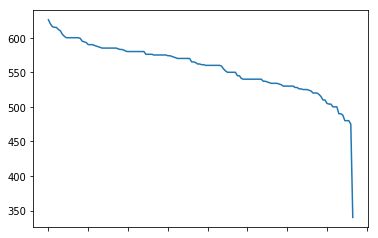

In [36]:
champ_stats = pd.DataFrame()
for champ in list(champs.columns):
    champ_stats[champ] = champs.loc['stats'][champ].values()
champ_stats = champ_stats.set_index([pd.Index(list(champs.loc['stats'][champ].keys()))])
champ_stats = champ_stats.T # transpose so it's easier to manipulate the data
# Add in the tag column so we can look at classes, and the partype column so we can see if they use mana, something else or nothing.
champ_stats['tags'] = champs.T['tags']
champ_stats['partype'] = champs.T['partype']

#Saving to a csv so we can use without interfacing with the API
champ_stats.to_csv('champ_stats.csv')

Now that we have a dataframe of champion stats we can begin our analysis. Take a look at the "LoL Champion Analysis.ipynb" notebook for next steps.